Dataset loaded:
   Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  

<Figure size 1000x600 with 0 Axes>

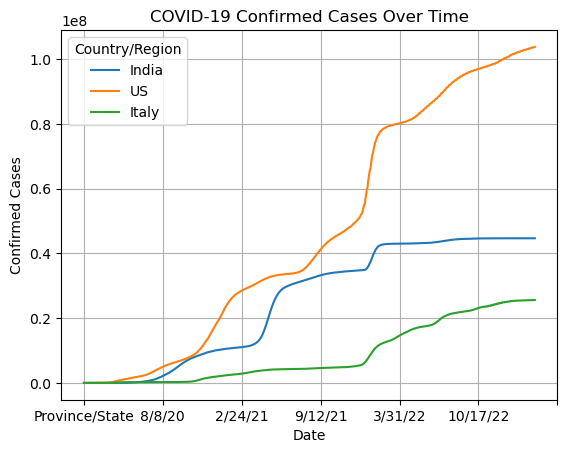


Peak Global Cases on: 3/9/23 with 676,570,149 cases

Daily New Global Cases:
 1/22/20      0.0
1/23/20    100.0
1/24/20    287.0
1/25/20    493.0
1/26/20    683.0
dtype: float64


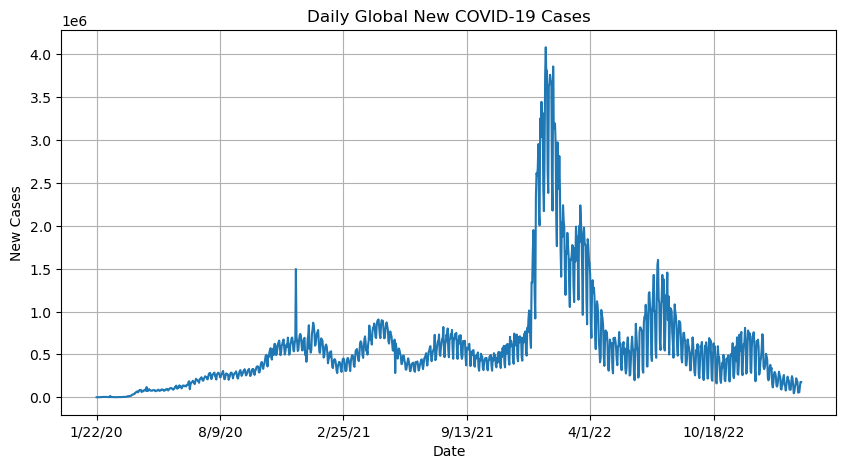


Top 5 Countries by Latest Total:
                    Latest
Country/Region           
US              103802702
India            44690738
France           39866718
Germany          38249060
Brazil           37076053


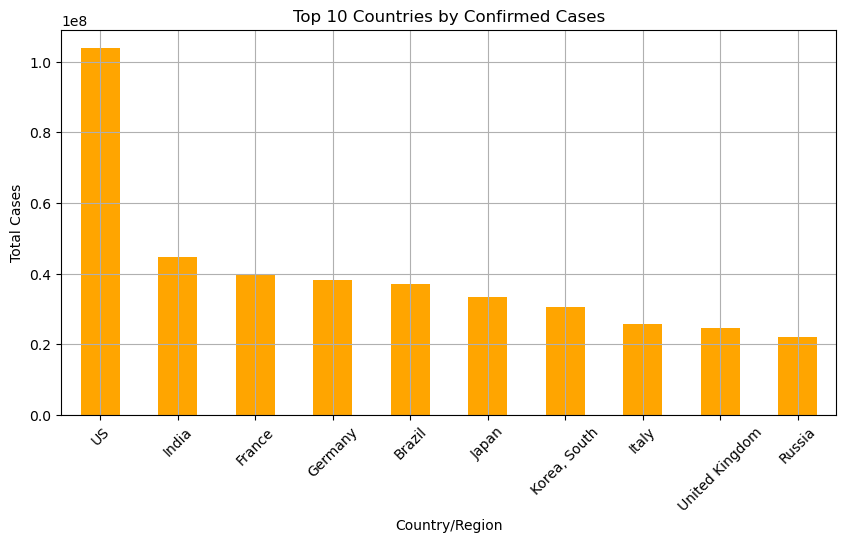

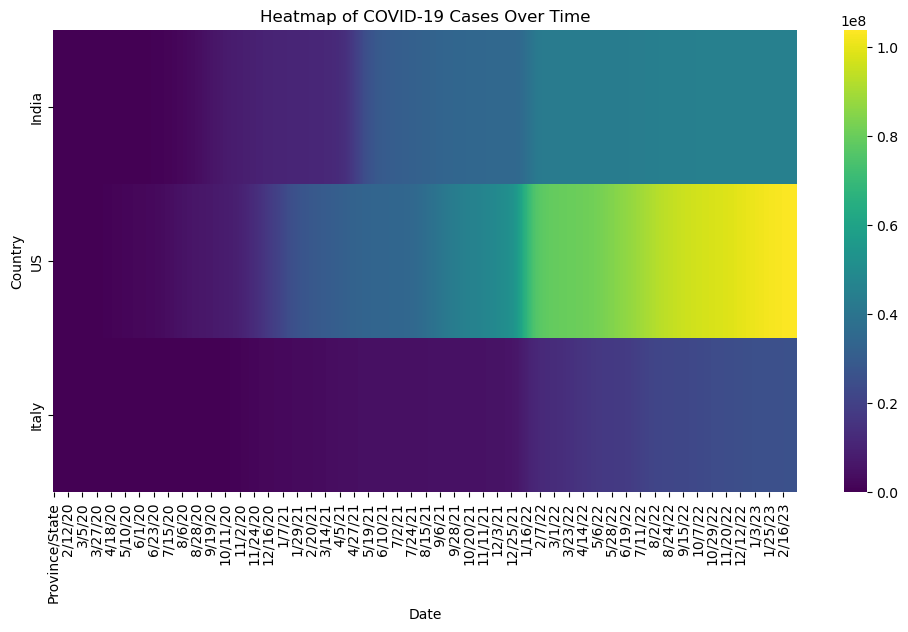

<Figure size 1000x600 with 0 Axes>

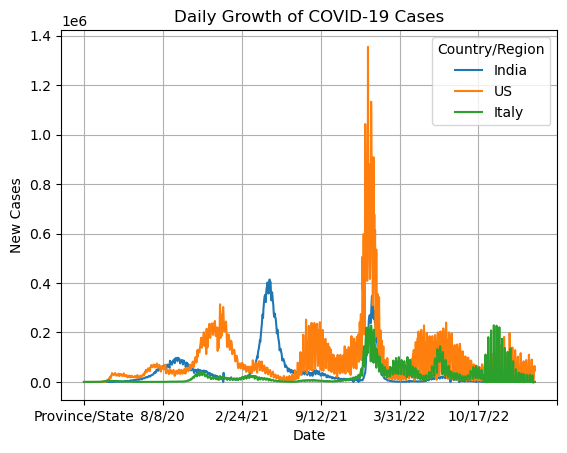

In [4]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset from your local machine
file_path = r"C:\Users\14163\Desktop\university cu boulder\GorgeBrown\Mashine Learning 1\Assignment 5\time_series_covid19_confirmed_global.csv"
df = pd.read_csv(file_path)
print("Dataset loaded:\n", df.head())

# 3. Display dataset info
print("\nDataset Info:")
df.info()

# 4. Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# 5. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 6. Aggregate data by country (sum over provinces/states)
df_country = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
print("\nAggregated by Country:\n", df_country.head())

# 7. Transpose for time series (dates become rows)
df_country_T = df_country.T
df_country_T = df_country_T.apply(pd.to_numeric, errors='coerce').fillna(0)
print("\nTransposed Time-Series Data:\n", df_country_T.head())

# 8. Plot confirmed cases for selected countries
countries = ['India', 'US', 'Italy']
plt.figure(figsize=(10, 6))
df_country_T[countries].plot()
plt.title("COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.show()

# 9. Compute global total and find peak
df_global = df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()
peak_day = df_global.idxmax()
peak_value = df_global.max()
print(f"\nPeak Global Cases on: {peak_day} with {peak_value:,} cases")

# 10. Daily new global cases
df_daily_new = df_global.diff().fillna(0)
print("\nDaily New Global Cases:\n", df_daily_new.head())

# 11. Plot daily global new cases
plt.figure(figsize=(10, 5))
df_daily_new.plot()
plt.title("Daily Global New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)
plt.show()

# 12. Add 'Latest' column for most recent date per country
df_country['Latest'] = df_country.iloc[:, -1]
df_country_sorted = df_country.sort_values(by='Latest', ascending=False)
print("\nTop 5 Countries by Latest Total:\n", df_country_sorted[['Latest']].head())

# 13. Top 10 countries and bar plot
top10 = df_country_sorted.head(10)
plt.figure(figsize=(10, 5))
top10['Latest'].plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Confirmed Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 14. Heatmap of COVID cases for selected countries
heatmap_data = df_country_T[countries].transpose().apply(pd.to_numeric, errors='coerce').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title("Heatmap of COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Country")
plt.show()

# 15. Daily growth for selected countries
df_country_diff = df_country_T.diff().fillna(0)
plt.figure(figsize=(10, 6))
df_country_diff[countries].plot()
plt.title("Daily Growth of COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)
plt.show()
